# House Price Prediction 
### Using Linear Regression Model

In [1]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
# Import Training DataSet
Train = pd.read_csv(r"C:\Users\aksha\Desktop\Internship\Bharat Intern\House Price Prediction\Train.csv")

In [3]:
Train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


# Data Preprocessing 

In [4]:
Train.shape

(29451, 12)

In [5]:
# Column Names
Train.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [6]:
# Change Column Name
Train.columns = ['POSTED BY', 'UNDER CONSTRUCTION', 'RERA', 'BHK NO', 'BHK OR RK',
       'SQUARE FT', 'READY TO MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET']

In [7]:
# Check DataType and Information
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED BY           29451 non-null  object 
 1   UNDER CONSTRUCTION  29451 non-null  int64  
 2   RERA                29451 non-null  int64  
 3   BHK NO              29451 non-null  int64  
 4   BHK OR RK           29451 non-null  object 
 5   SQUARE FT           29451 non-null  float64
 6   READY TO MOVE       29451 non-null  int64  
 7   RESALE              29451 non-null  int64  
 8   ADDRESS             29451 non-null  object 
 9   LONGITUDE           29451 non-null  float64
 10  LATITUDE            29451 non-null  float64
 11  TARGET              29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [8]:
# Description of Data
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
UNDER CONSTRUCTION,29451.0,0.179756,3.839908e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,29451.0,0.317918,4.656753e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK NO,29451.0,2.392279,8.790913e-01,1.000000,2.000000,2.000000,3.000000,2.000000e+01
SQUARE FT,29451.0,19802.170190,1.901335e+06,3.000000,900.021130,1175.056750,1550.688124,2.545455e+08
READY TO MOVE,29451.0,0.820244,3.839908e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,29451.0,0.929578,2.558613e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,29451.0,21.300255,6.205306e+00,-37.713008,18.452663,20.750000,26.900926,5.991288e+01
LATITUDE,29451.0,76.837695,1.055775e+01,-121.761248,73.798100,77.324137,77.828740,1.529627e+02
TARGET,29451.0,142.898746,6.568807e+02,0.250000,38.000000,62.000000,100.000000,3.000000e+04


In [9]:
# Check Null Values in DataSet
Train.isnull().sum()

POSTED BY             0
UNDER CONSTRUCTION    0
RERA                  0
BHK NO                0
BHK OR RK             0
SQUARE FT             0
READY TO MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
TARGET                0
dtype: int64

In [10]:
Train['UNDER CONSTRUCTION'].value_counts()

0    24157
1     5294
Name: UNDER CONSTRUCTION, dtype: int64

In [11]:
Train['RERA'].value_counts()

0    20088
1     9363
Name: RERA, dtype: int64

In [12]:
Train['BHK NO'].value_counts().sort_index()

1      3574
2     13324
3     10546
4      1723
5       190
6        52
7        11
8        10
9         3
10        4
11        1
12        3
13        1
15        4
17        1
20        4
Name: BHK NO, dtype: int64

In [13]:
Train['BHK OR RK'].value_counts()

BHK    29427
RK        24
Name: BHK OR RK, dtype: int64

In [14]:
Train['READY TO MOVE'].value_counts().sort_index()

0     5294
1    24157
Name: READY TO MOVE, dtype: int64

In [15]:
Train['RESALE'].value_counts().sort_index()

0     2074
1    27377
Name: RESALE, dtype: int64

In [16]:
# Correlation Between Features
Train.corr()

,UNDER CONSTRUCTION,RERA,BHK NO,SQUARE FT,READY TO MOVE,RESALE,LONGITUDE,LATITUDE,TARGET
UNDER CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK NO,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY TO MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET,0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


# Visualization

<AxesSubplot:>

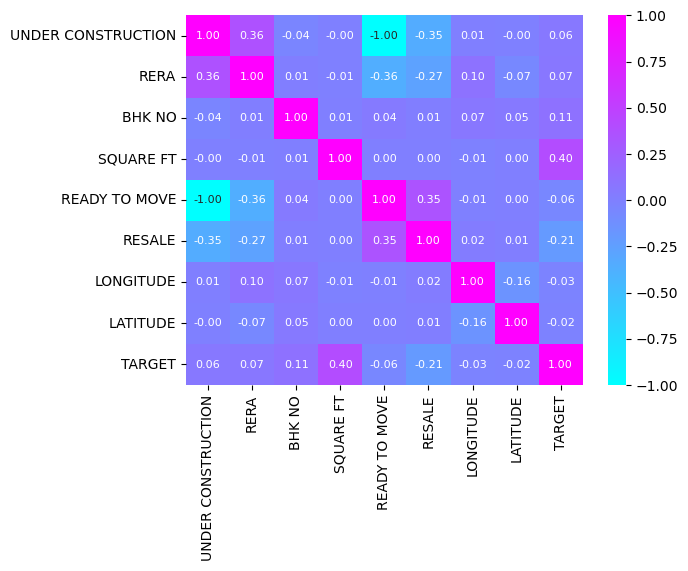

In [17]:
sns.heatmap(Train.corr(), annot=True, cmap='cool', annot_kws={"size":8}, fmt='.2f')

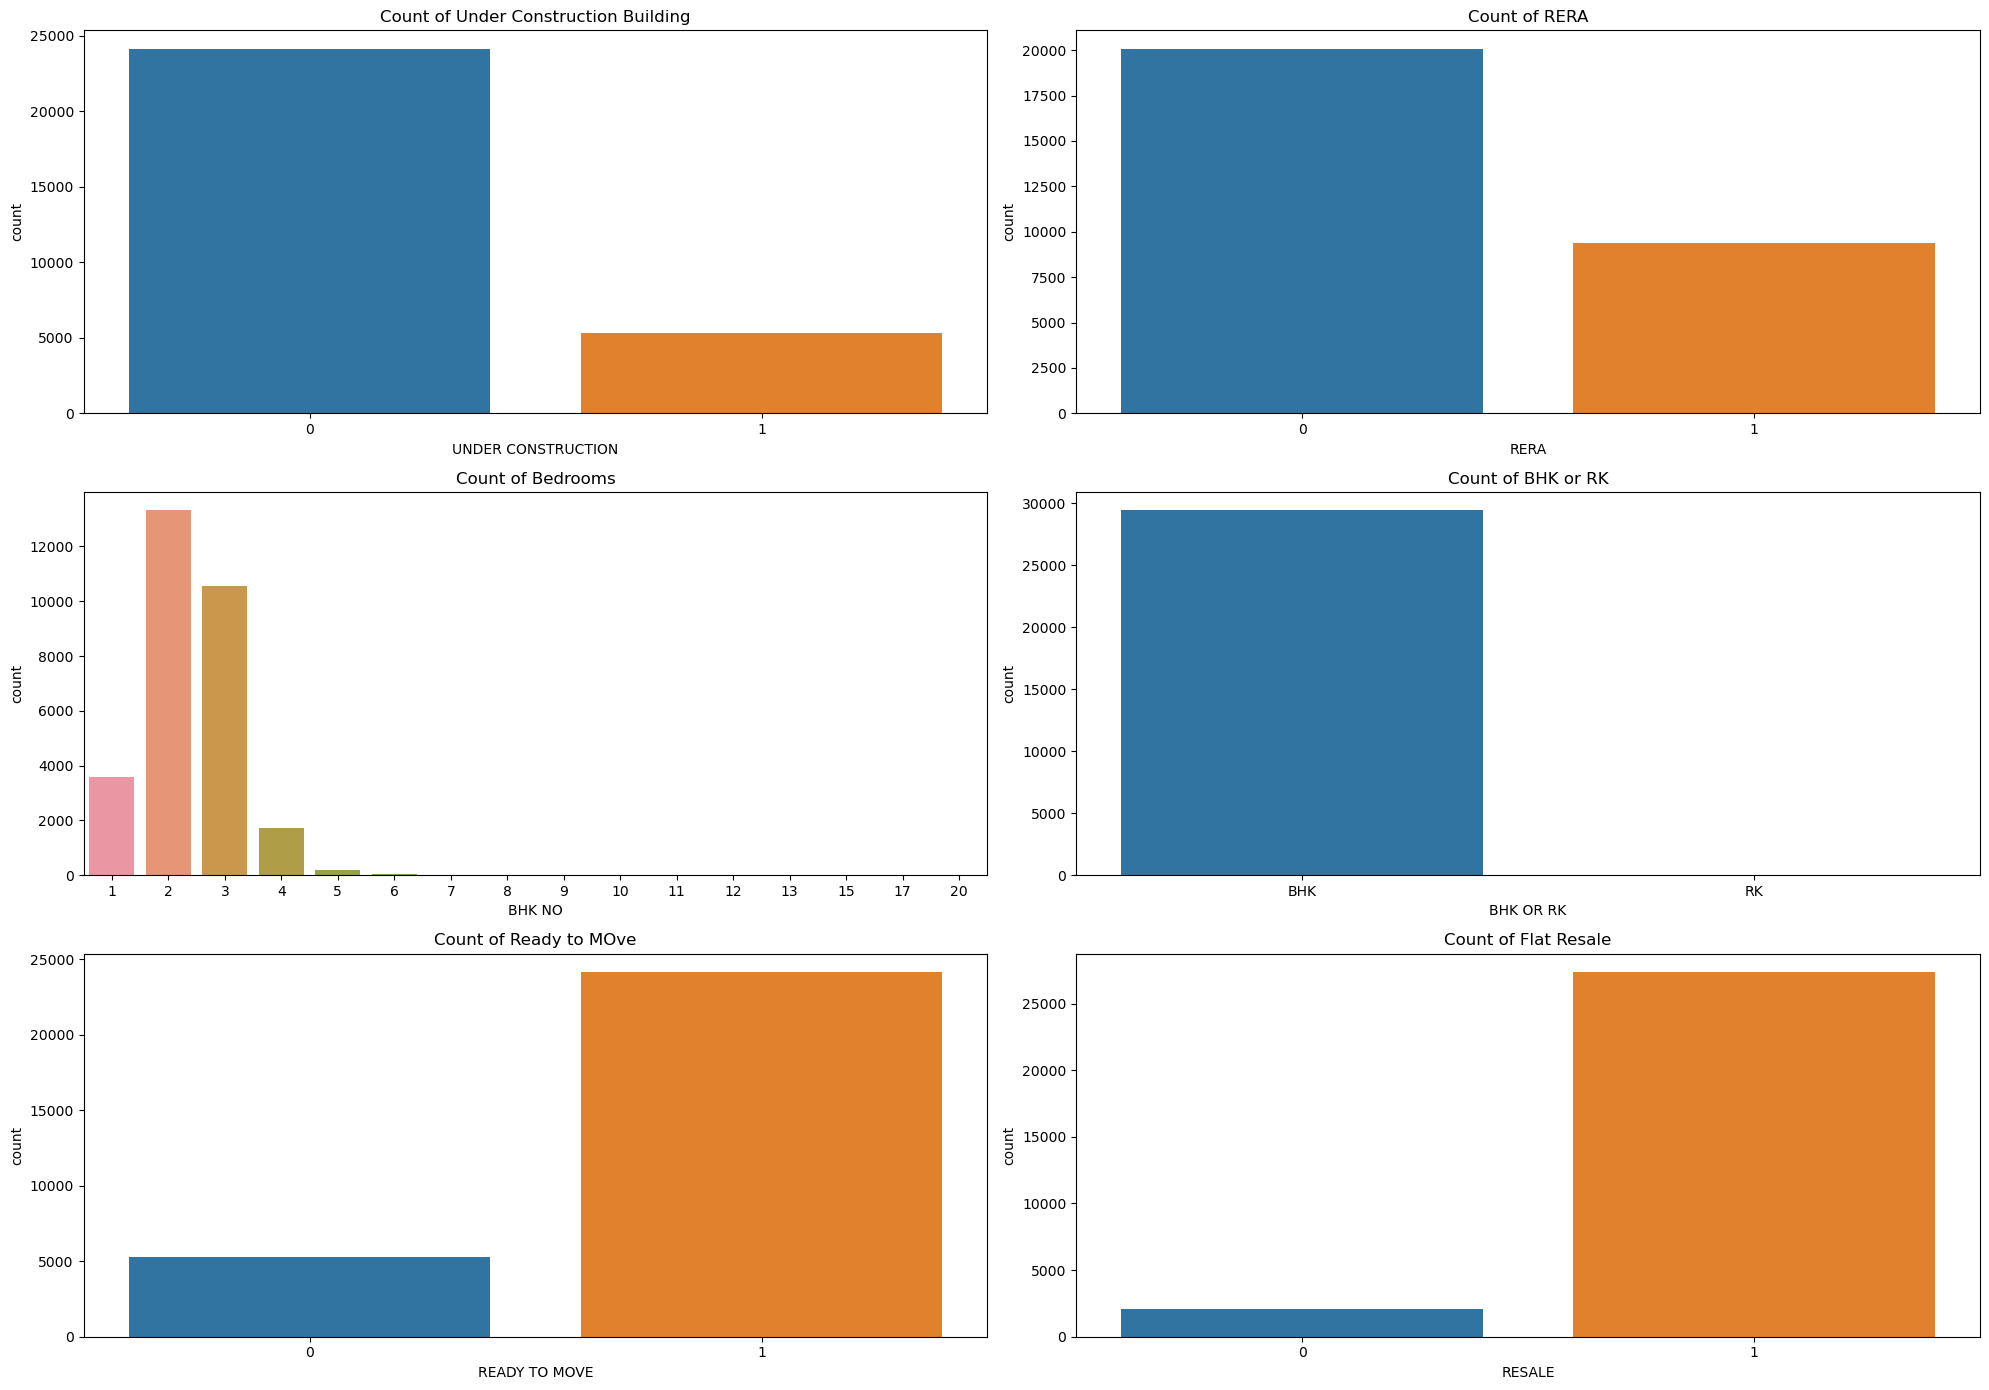

In [18]:
plt.figure(figsize=(20,14))
plt.subplot(3,2,1)
sns.countplot(data=Train, x="UNDER CONSTRUCTION")
plt.title('Count of Under Construction Building')

plt.subplot(3,2,2)
sns.countplot(data=Train, x="RERA")
plt.title('Count of RERA')

plt.subplot(3,2,3)
sns.countplot(data=Train, x="BHK NO")
plt.title('Count of Bedrooms')

plt.subplot(3,2,4)
sns.countplot(data=Train, x="BHK OR RK")
plt.title('Count of BHK or RK')

plt.subplot(3,2,5)
sns.countplot(data=Train, x="READY TO MOVE")
plt.title('Count of Ready to MOve')

plt.subplot(3,2,6)
sns.countplot(data=Train, x="RESALE")
plt.title('Count of Flat Resale')

plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Square Feet')

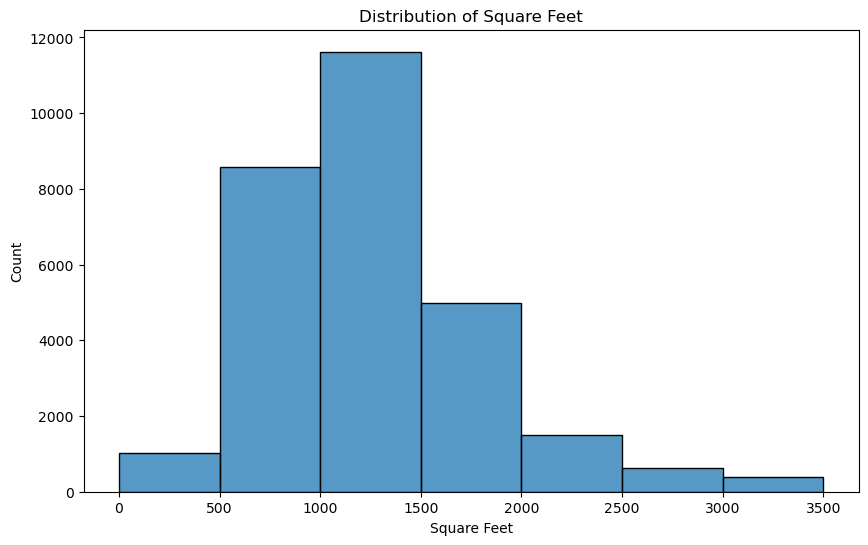

In [19]:
plt.figure(figsize=(10, 6)) 

bin_edges = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]

sns.histplot(data=Train, x="SQUARE FT", bins=bin_edges)
plt.xlabel("Square Feet")
plt.ylabel("Count")
plt.title("Distribution of Square Feet")

<AxesSubplot:title={'center':'TARGET'}, xlabel='BHK NO'>

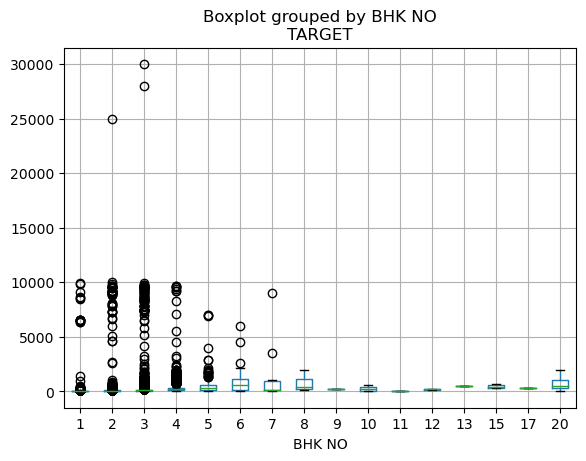

In [20]:
Train.boxplot(column='TARGET', by='BHK NO')

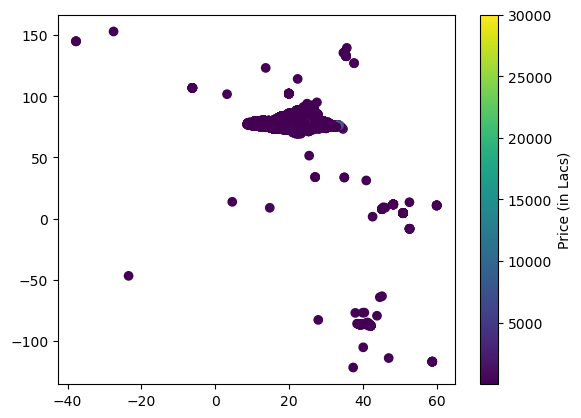

In [21]:
plt.scatter(Train['LONGITUDE'], Train['LATITUDE'], c=Train['TARGET'])
plt.colorbar(label='Price (in Lacs)')

# Model Preprocessing

### Train Data Preprocessing

In [22]:
# Label Encoding for Categorical Columns
le = LabelEncoder()
Train['BHK OR RK'] = le.fit_transform(Train['BHK OR RK'])
Train['POSTED BY'] = le.fit_transform(Train['POSTED BY'])

In [23]:
# Drop unnesseary column
Train = Train.drop(['ADDRESS'], axis=1)

In [24]:
# Standard Scaling for Scale a column in one unit.
sc = StandardScaler()
Train[['SQUARE FT', 'LONGITUDE', 'LATITUDE']] = sc.fit_transform(Train[['SQUARE FT', 'LONGITUDE', 'LATITUDE']])

In [25]:
Train

,POSTED BY,UNDER CONSTRUCTION,RERA,BHK NO,BHK OR RK,SQUARE FT,READY TO MOVE,RESALE,LONGITUDE,LATITUDE,TARGET
0,2,0,0,2,0,-0.009731,1,1,-1.342478,0.072011,55.0
1,1,0,0,2,0,-0.009744,1,1,-1.454541,-0.018289,51.0
2,2,0,0,2,0,-0.009924,1,1,-1.373400,0.075254,43.0
3,2,0,1,2,0,-0.009926,1,1,1.183208,0.048004,62.5
4,1,1,0,2,0,-0.009890,0,1,0.208204,1.103210,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,-0.009100,1,1,0.941206,0.114191,45.0
29447,2,0,0,2,0,-0.010010,1,1,3.004762,-15.438065,16.0
29448,1,0,0,2,0,-0.009877,1,1,0.907066,-0.095637,27.1
29449,2,0,0,2,0,-0.009927,1,1,-1.353720,0.321117,67.0


In [26]:
# Split Dataset for Training Model
X_train = Train.drop(['TARGET'], axis=1)
y_train = Train['TARGET']

### Test Data for Preprocessing

In [27]:
# Import Test DataSet
Test = pd.read_csv(r"C:\Users\aksha\Desktop\Internship\Bharat Intern\House Price Prediction\Test.csv")

In [28]:
Test.columns = ['POSTED BY', 'UNDER CONSTRUCTION', 'RERA', 'BHK NO', 'BHK OR RK',
       'SQUARE FT', 'READY TO MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE']

In [29]:
X_Test = Test

In [30]:
# Transform Column using Label Encoding and Standard Scaling.
le = LabelEncoder()
X_Test['BHK OR RK'] = le.fit_transform(X_Test['BHK OR RK'])
X_Test['POSTED BY'] = le.fit_transform(X_Test['POSTED BY'])
X_Test = X_Test.drop(['ADDRESS'], axis=1)
sc = StandardScaler()
X_Test[['SQUARE FT', 'LONGITUDE', 'LATITUDE']] = sc.fit_transform(X_Test[['SQUARE FT', 'LONGITUDE', 'LATITUDE']])

In [31]:
X_Test

,POSTED BY,UNDER CONSTRUCTION,RERA,BHK NO,BHK OR RK,SQUARE FT,READY TO MOVE,RESALE,LONGITUDE,LATITUDE
0,2,0,0,1,0,-0.013512,1,1,-0.004215,-0.383302
1,1,1,1,2,0,-0.011959,0,0,-0.375779,-0.373345
2,1,0,0,2,0,-0.009173,1,1,0.211063,1.145002
3,1,0,0,3,0,-0.008300,1,1,0.922522,-0.132146
4,2,0,0,1,0,-0.014211,1,1,0.228509,-0.400895
...,...,...,...,...,...,...,...,...,...,...
68715,1,0,1,2,0,-0.011614,1,1,-0.341163,-0.391655
68716,1,0,1,3,0,-0.002793,1,1,1.516924,-0.017158
68717,1,1,1,1,0,0.186476,0,0,-0.334350,-0.389190
68718,1,0,0,2,0,-0.009681,1,1,-0.451753,-0.294798


# Model Building

In [32]:
# Build Linear Regression Model
model = LinearRegression()
fit = model.fit(X_train, y_train)

In [33]:
# Predict Target value of Test Data
y_Test = fit.predict(X_Test)

In [34]:
X_Test['TARGET'] = y_Test

In [35]:
X_Test

,POSTED BY,UNDER CONSTRUCTION,RERA,BHK NO,BHK OR RK,SQUARE FT,READY TO MOVE,RESALE,LONGITUDE,LATITUDE,TARGET
0,2,0,0,1,0,-0.013512,1,1,-0.004215,-0.383302,-29.285568
1,1,1,1,2,0,-0.011959,0,0,-0.375779,-0.373345,604.928489
2,1,0,0,2,0,-0.009173,1,1,0.211063,1.145002,55.158448
3,1,0,0,3,0,-0.008300,1,1,0.922522,-0.132146,143.845060
4,2,0,0,1,0,-0.014211,1,1,0.228509,-0.400895,-34.600734
...,...,...,...,...,...,...,...,...,...,...,...
68715,1,0,1,2,0,-0.011614,1,1,-0.341163,-0.391655,116.098907
68716,1,0,1,3,0,-0.002793,1,1,1.516924,-0.017158,154.551203
68717,1,1,1,1,0,0.186476,0,0,-0.334350,-0.389190,571.531157
68718,1,0,0,2,0,-0.009681,1,1,-0.451753,-0.294798,92.825803


### Predict Train Values Data for Accuracy

In [36]:
# Predict Train Values and Check Accuracy.
y_pred = fit.predict(X_train)

In [37]:
print("Training Error:",mean_squared_error(y_train, y_pred))
print('\n')
print("Training Error:",mean_absolute_percentage_error(y_train, y_pred))

Training Error: 336293.670761881


Training Error: 1.829327461204777
